In [159]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/purva/desktop/cmpe255/cmpe255_labs/cmpe255_lab4/"
#CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", "Classification", fig_id + ".png")
    print("Saving figure", fig_id)    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [160]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [161]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [162]:
mnist.data.shape

(70000, 784)

In [163]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [164]:
y.shape

(70000,)

In [165]:
28*28

784

Saving figure some_digit_plot


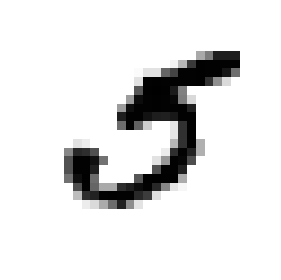

In [166]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [167]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [168]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


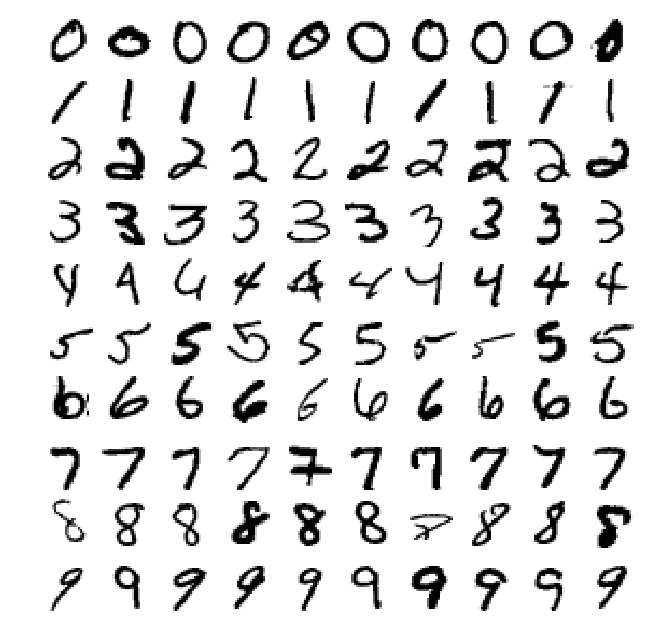

In [169]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [170]:
y[36000]

5

In [171]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [172]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [173]:
y_train_even = (y_train % 2 == 0)
y_test_even = (y_test % 2 == 0)

In [174]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [175]:
sgd_clf.predict([some_digit])

array([False])

In [176]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_even, cv=3, scoring="accuracy")

array([0.85785711, 0.7514    , 0.8679934 ])

In [177]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_even):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_even[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_even[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8578571071446428
0.7514
0.8679933996699835


In [178]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [179]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_even, cv=3, scoring="accuracy")

array([0.5048, 0.5104, 0.5102])

In [180]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_even, cv=3)

In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_even, y_train_pred)

array([[22296,  8212],
       [ 2243, 27249]])

In [182]:
y_train_perfect_predictions = y_train_even

In [183]:
confusion_matrix(y_train_even, y_train_perfect_predictions)

array([[30508,     0],
       [    0, 29492]])

In [184]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_even, y_train_pred)

0.7684216463156708

In [185]:
27249 / (27249 + 8212)

0.7684216463156708

In [186]:
recall_score(y_train_even, y_train_pred)

0.9239454767394548

In [187]:
27249 / (27249 + 2243)

0.9239454767394548

In [188]:
from sklearn.metrics import f1_score
f1_score(y_train_even, y_train_pred)

0.8390374578541407

In [189]:
27249 / (27249 + (2243 + 8212)/2)

0.8390374578541406

In [190]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-447816.03898908])

In [191]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [192]:
y_some_digit_pred

array([False])

In [193]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [194]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_even, cv=3,
                             method="decision_function")

In [195]:
y_scores.shape

(60000,)

In [196]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [197]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_even, y_scores)

Saving figure precision_recall_vs_threshold_plot


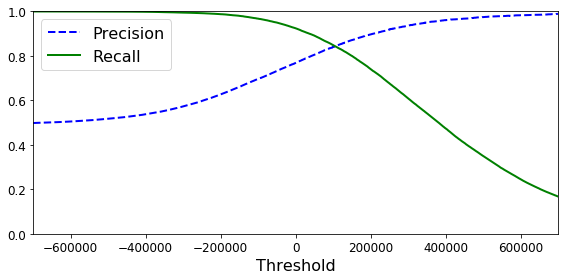

In [198]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [199]:
(y_train_pred == (y_scores > 0)).all()

True

In [200]:
y_train_pred_90 = (y_scores > 70000)

In [201]:
precision_score(y_train_even, y_train_pred_90)

0.8196445037998028

In [202]:
recall_score(y_train_even, y_train_pred_90)

0.8740336362403364

Saving figure precision_vs_recall_plot


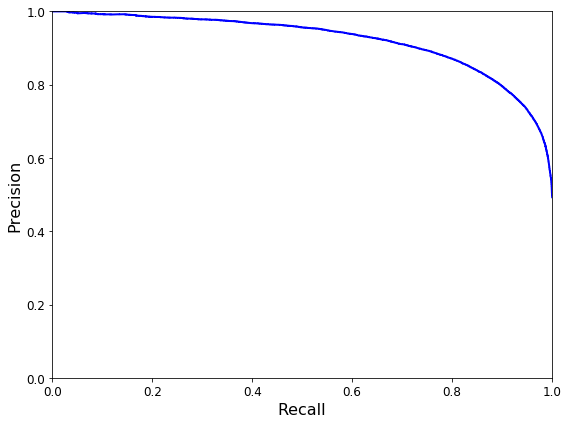

In [203]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

In [204]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_even, y_scores)

Saving figure roc_curve_plot


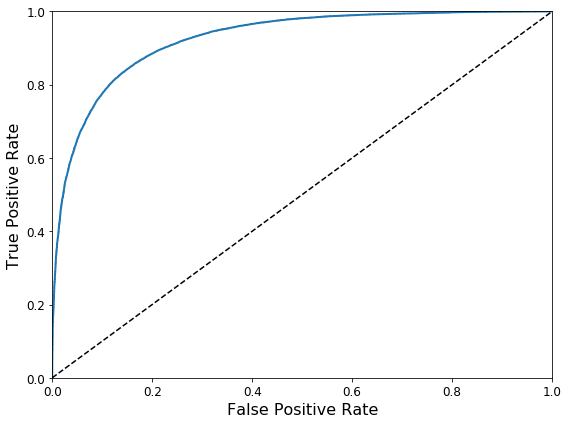

In [205]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [206]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_even, y_scores)

0.9252139293416239

In [207]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_even, cv=3,
                                    method="predict_proba")

In [208]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


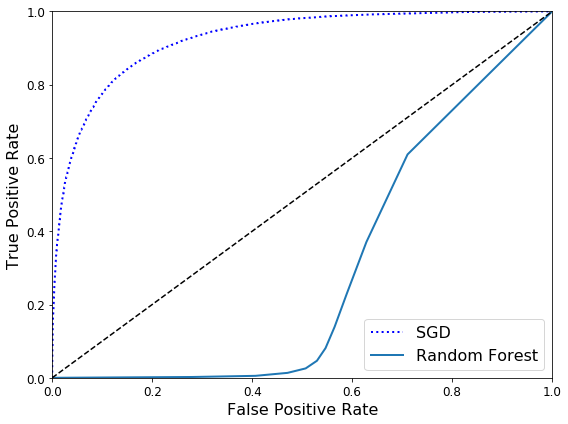

In [209]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [210]:
roc_auc_score(y_train_even, y_scores_forest)

0.9931244601896605

In [211]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_even, cv=3)
precision_score(y_train_even, y_train_pred_forest)

0.9701221185510428

In [212]:
recall_score(y_train_even, y_train_pred_forest)

0.9589380170893802

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train_even)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [219]:
knn_clf.predict([some_digit])

array([False])

In [220]:
cross_val_score(knn_clf, X_train, y_train_even, cv=3, scoring="accuracy")

array([0.98180091, 0.9834    , 0.98274914])

In [ ]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train_even, cv=3)

In [ ]:
precision_score(y_train_even, y_train_pred_knn)

In [ ]:
f1_score(y_train_even, y_train_pred_knn)